In [116]:
from river.datasets import Bikes
# from sdv.single_table import GaussianCopulaSynthesizer
# from sdv.metadata import SingleTableMetadata
import pandas as pd
import numpy as np
from utils import plot_drift, plot_data
from novelty import ephemeral, persistant, periodic

from drift import detect_drift

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
bikes = Bikes()
bikes.size

13125015

In [125]:
train_split, test_split = 10000, 20000

In [126]:
# Step 1: Prepare Original Dataset
data_list = [{**x, 'value': y} for x, y in bikes.take(train_split + test_split)]
train_data, test_data = data_list[:train_split], data_list[train_split:]
df_train, df_test = pd.DataFrame(train_data), pd.DataFrame(test_data)
df_all = pd.concat([df_train, df_test])

display(df_all)

,moment,station,clouds,description,humidity,pressure,temperature,wind,value
0,2016-04-01 00:00:07,metro-canal-du-midi,75,light rain,81,1017.0,6.54,9.3,1
1,2016-04-01 00:00:16,place-des-carmes,75,light rain,81,1017.0,6.54,9.3,3
2,2016-04-01 00:00:35,place-des-carmes,75,light rain,81,1017.0,6.54,9.3,3
3,2016-04-01 00:04:50,place-esquirol,75,light rain,81,1017.0,6.54,9.3,2
4,2016-04-01 00:05:29,place-esquirol,75,light rain,81,1017.0,6.54,9.3,2
...,...,...,...,...,...,...,...,...,...
19995,2016-04-28 17:35:56,pomme,0,clear sky,38,1016.0,18.15,5.7,13
19996,2016-04-28 17:36:40,pomme,0,clear sky,38,1016.0,18.15,5.7,13
19997,2016-04-28 17:37:02,place-esquirol,0,clear sky,38,1016.0,18.15,5.7,28
19998,2016-04-28 17:38:40,place-esquirol,0,clear sky,38,1016.0,18.15,5.7,29


In [127]:
feature_name = 'temperature'

In [128]:
plot_drift(feature_name, df_train, df_test)

In [129]:
drift_points = detect_drift(feature_name, df_train, df_test, delta=20, min_window_length=100, grace_period=1000)
plot_drift(feature_name, df_train, df_test, drift_points)

🚨 Drift detected at sample 12048, value: 18.0, variance of 354287.24494062853, estimate of 14.489143827985938


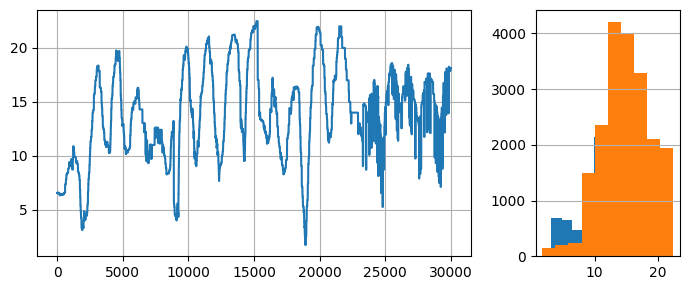

In [ ]:
plot_data(np.concatenate((df_train[feature_name], df_test[feature_name])), df_train[feature_name], df_test[feature_name])

🚨 Drift detected at sample 240, value: 14.03, variance of 52388.63525485493, estimate of 12.914715401785683
🚨 Drift detected at sample 2288, value: 39.51, variance of 174398.3147622765, estimate of 20.18485491071427
🚨 Drift detected at sample 4336, value: 42.12, variance of 29184.369511994744, estimate of 46.690998883928486
🚨 Drift detected at sample 6384, value: 46.0, variance of 31721.641587443653, estimate of 46.39063058035673
🚨 Drift detected at sample 8432, value: 15.89, variance of 266542.49417476356, estimate of 18.858292410713975
🚨 Drift detected at sample 10480, value: 14.6, variance of 79817.75734012378, estimate of 14.826389508928571
🚨 Drift detected at sample 12528, value: 14.0, variance of 17125.50717142771, estimate of 17.30785714285721
🚨 Drift detected at sample 14576, value: 12.79, variance of 6890.278572991129, estimate of 13.6601227678571
🚨 Drift detected at sample 16624, value: 15.57, variance of 7671.692686997872, estimate of 15.551891741071417
🚨 Drift detected at s

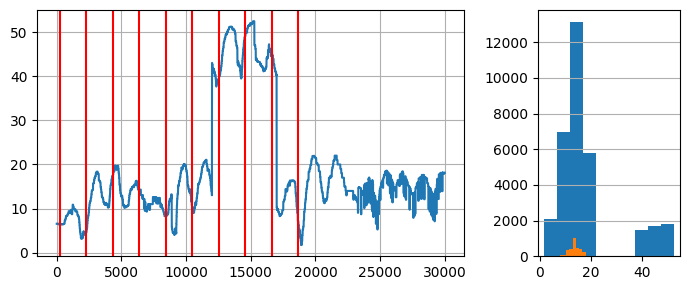

In [ ]:
df_ephemeral = ephemeral(df_test, feature_name, 2000, 5000, lambda x: x + 30)
drift_points = detect_drift(feature_name, df_train, df_ephemeral, delta=15, min_window_length=1000)

plot_drift(feature_name, df_train, df_ephemeral, drift_points)

plot_data(
    np.concatenate((df_train[feature_name], df_ephemeral[feature_name])),
    np.concatenate((df_train[feature_name], df_ephemeral[feature_name].iloc[2000 - train_split:], df_ephemeral[feature_name].iloc[:5000 + train_split])),
    df_ephemeral[feature_name].iloc[2000 - train_split : 5000 - train_split],
    drift_points
)

In [107]:
df_persistant = persistant(df_test, feature_name, 14000, lambda x: x + 30)
drift_points = detect_drift(feature_name, df_train, df_persistant, delta=20, min_window_length=2000)
plot_drift(feature_name, df_train, df_persistant, drift_points)

🚨 Drift detected at sample 17048, value: 48.0, variance of 3119176.002427272, estimate of 19.58272671568631


In [18]:
df_persistant = persistant(df_test, feature_name, 200, lambda x: x + 30, after=False)
drift_points = detect_drift(feature_name, df_train, df_persistant)
plot_drift(feature_name, df_train, df_persistant, drift_points)

🚨 Drift detected at sample 120, value: 111
🚨 Drift detected at sample 376, value: 87
🚨 Drift detected at sample 632, value: 67
🚨 Drift detected at sample 888, value: 59


In [19]:
df_periodic = periodic(df_test, feature_name, 200, 200, 300, lambda x: x + 30)
drift_points = detect_drift(feature_name, df_train, df_periodic)
plot_drift(feature_name, df_train, df_periodic, drift_points)

🚨 Drift detected at sample 152, value: 81
🚨 Drift detected at sample 504, value: 111
🚨 Drift detected at sample 760, value: 62


In [51]:
df_persistant = persistant(df_test, feature_name, 200, lambda x: x[feature_name] + x.name // 20, on_row=True)
drift_points = detect_drift(feature_name, df_train, df_persistant)
plot_drift(feature_name, df_train, df_persistant, drift_points)

🚨 Drift detected at sample 152, value: 81
🚨 Drift detected at sample 408, value: 107
🚨 Drift detected at sample 664, value: 100
🚨 Drift detected at sample 952, value: 114
